In [1]:
import sys
sys.path.insert(0,'/Users/august/Coding/topic-modelling')

In [2]:
from topic_modelling.data_loader import DataLoader
from topic_modelling.kmeans import KMeansCluster
import timeit
import matplotlib.pyplot as plt

data_path = "../data/abcnews_lem_stem.pickle"

In [3]:
def read_data(n_rows):
    dl = DataLoader()
    corpus = dl.load(data_path, n_rows=n_rows)
    return corpus

In [8]:
def kMeansClustering(corpus, clusters):
    cluster = KMeansCluster(corpus, TFIDF_method="native", num_clusters=clusters)
    cluster.cluster_documents(verbosity=False)

In [10]:
n = [1000, 5000, 10000, 25000, 50000]
n_clusters = [5, 10, 20]
times = []
for n_rows in n:
    row_times = []
    for clusters in n_clusters:
        corpus = read_data(n_rows)
        time = timeit.timeit(stmt= lambda: kMeansClustering(corpus, clusters), number=1)
        row_times.append(time)
        print(f"Time for {n_rows} rows X {clusters} clusters: ", time)
    times.append(row_times)

Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix
Time for 1000 rows X 5 clusters:  0.41084145800050464
Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix
Time for 1000 rows X 10 clusters:  0.6354757079998308
Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix
Time for 1000 rows X 20 clusters:  0.9237412499996935
Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix
Time for 5000 rows X 5 clusters:  4.911004999999932
Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix
Time for 5000 rows X 10 clusters:  7.6081085829991935
Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix
Time for 5000 rows X 20 clusters:  11.550890292000076
Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix
Time for 10000 rows X 5 clusters:  13.922221583000464
Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF

In [11]:
cluster_5 = [time[0] for time in times]
cluster_10 = [time[1] for time in times]
cluster_20 = [time[2] for time in times]

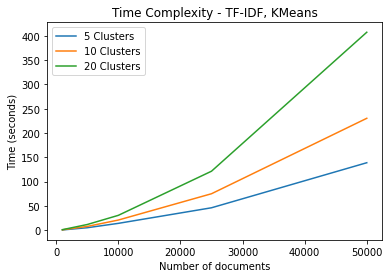

In [12]:
plt.plot(n, cluster_5, label = "5 Clusters")
plt.plot(n, cluster_10, label= "10 Clusters")
plt.plot(n, cluster_20, label = "20 Clusters")
plt.title("Time Complexity - TF-IDF, KMeans")
plt.xlabel("Number of documents")
plt.ylabel("Time (seconds)")
plt.legend()

plt.show()